In [1]:
from tensorflow.keras.layers import *
import tensorflow as tf

import matplotlib.pyplot as plt

tf.random.set_seed(0)

In [2]:
# load data

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

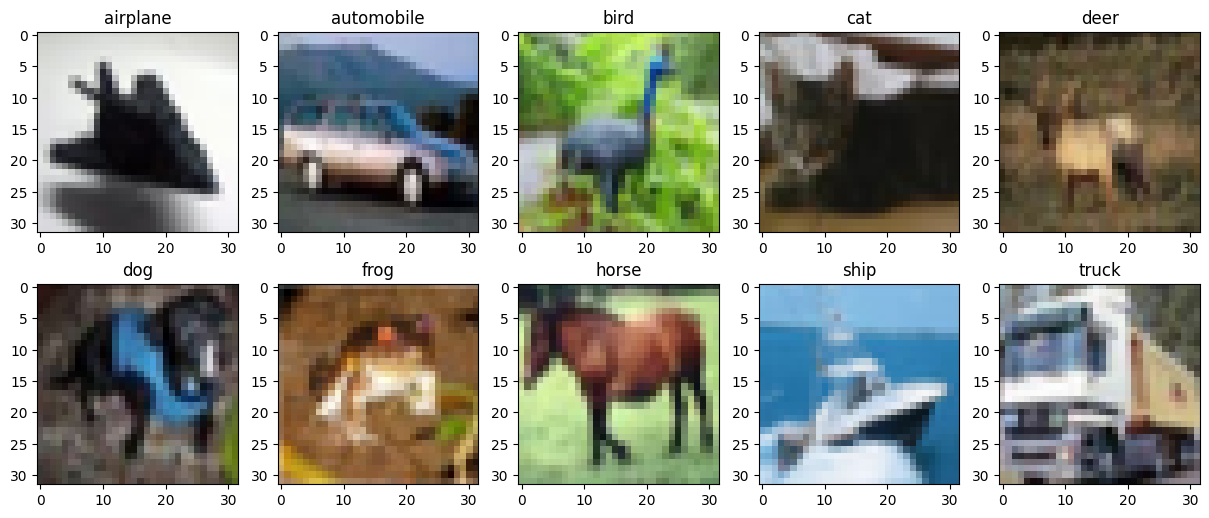

In [3]:
# sample labels

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[y_train[:,0]==i][0], cmap='gray')
    plt.title(classes[i])
plt.show()

In [4]:
# data processing

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
# build model

model = tf.keras.Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                        

In [7]:
# compile and train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 14s 29ms/step - loss: 1.4560 - accuracy: 0.4797 - val_loss: 1.9040 - val_accuracy: 0.3590
Epoch 2/5
352/352 [==============================] - 9s 25ms/step - loss: 1.0714 - accuracy: 0.6230 - val_loss: 1.2047 - val_accuracy: 0.5860
Epoch 3/5
352/352 [==============================] - 9s 25ms/step - loss: 0.9093 - accuracy: 0.6796 - val_loss: 1.3773 - val_accuracy: 0.5530
Epoch 4/5
352/352 [==============================] - 9s 25ms/step - loss: 0.7815 - accuracy: 0.7248 - val_loss: 1.1588 - val_accuracy: 0.6186
Epoch 5/5
352/352 [==============================] - 11s 31ms/step - loss: 0.6660 - accuracy: 0.7670 - val_loss: 1.0277 - val_accuracy: 0.6522


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0652 - accuracy: 0.6472


[1.0652440786361694, 0.6471999883651733]

In [9]:
model.save('models/cifar10.h5')